# **Artificial Neural Network (ANN) or Fully connect layer**


| Framework  | Creator                     | Governance / Stewardship          | First Released |
| ---------- | --------------------------- | --------------------------------- | -------------- |
| TensorFlow | Google Brain (Google)       | Google                            | Nov 2015       |
| PyTorch    | Facebook AI Research (Meta) | Now under PyTorch Foundation (LF) | \~2016         |
| MindSpore  | Huawei                      | Huawei                            | Mar 2020       |


In [1]:
# EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ann model 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers

In [2]:
data = pd.read_csv(r"C:\Users\PC\Downloads\archive (15)\mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Define mapping dictionaries for all features
mappings = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray','r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red','w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large',
'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate','r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered','v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths','u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Apply all mappings to the dataset
for column, mapping in mappings.items():
    if column in data.columns:
        data[column] = data[column].replace(mapping)



In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [6]:
print(data.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [7]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')>

In [8]:
label_encoder = LabelEncoder()
for column in data.columns:
    data[column]=label_encoder.fit_transform(data[column])

In [9]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


In [10]:
y = data["class"].values
x= data.drop(['class'],axis=1)

In [11]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,0,1,6,0,0,0,11,0,...,3,4,4,0,1,1,4,2,1,1
8120,2,3,0,1,6,0,0,0,11,0,...,3,4,4,0,0,1,4,2,4,1
8121,3,3,0,1,6,0,0,0,1,0,...,3,4,4,0,1,1,4,2,1,1
8122,4,2,0,1,3,1,0,1,2,1,...,2,7,7,0,2,1,0,7,4,1


In [12]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=40)

In [14]:
print(f"X train : {X_train.shape}")
print(f"y train : {y_train.shape}")
print(f"X test : {X_test.shape}")
print(f"y test : {y_test.shape}")

X train : (6499, 22)
y train : (6499,)
X test : (1625, 22)
y test : (1625,)


# **ANN Model(Baseline)**

In [15]:
model_no_reg = keras.Sequential(
    [layers.Dense(64,activation='relu',input_shape = (22,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')],name = 'no_regularization'   
)
print('Model created')

Model created


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model_no_reg.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
print("Model compiled")

Model compiled


In [21]:
model_no_reg.summary()

Model: "no_regularization"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,745 (30.25 KB)

 Trainable params: 7,745 (30.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
print("Model training")
history = model_no_reg.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1,validation_split=0.2)

Model training
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7861 - loss: 0.4250 - val_accuracy: 0.9708 - val_loss: 0.0949
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9857 - loss: 0.0651 - val_accuracy: 0.9954 - val_loss: 0.0271
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0172 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.5571e-04 - val_accuracy: 1.0000 - val_loss: 9.6702e-04
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.

In [23]:
test_loss_no_reg,test_acc_no_reg = model_no_reg.evaluate(X_test,y_test,verbose=1)
print(f"Test accuracy : {test_acc_no_reg}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5684e-05
Test accuracy : 1.0


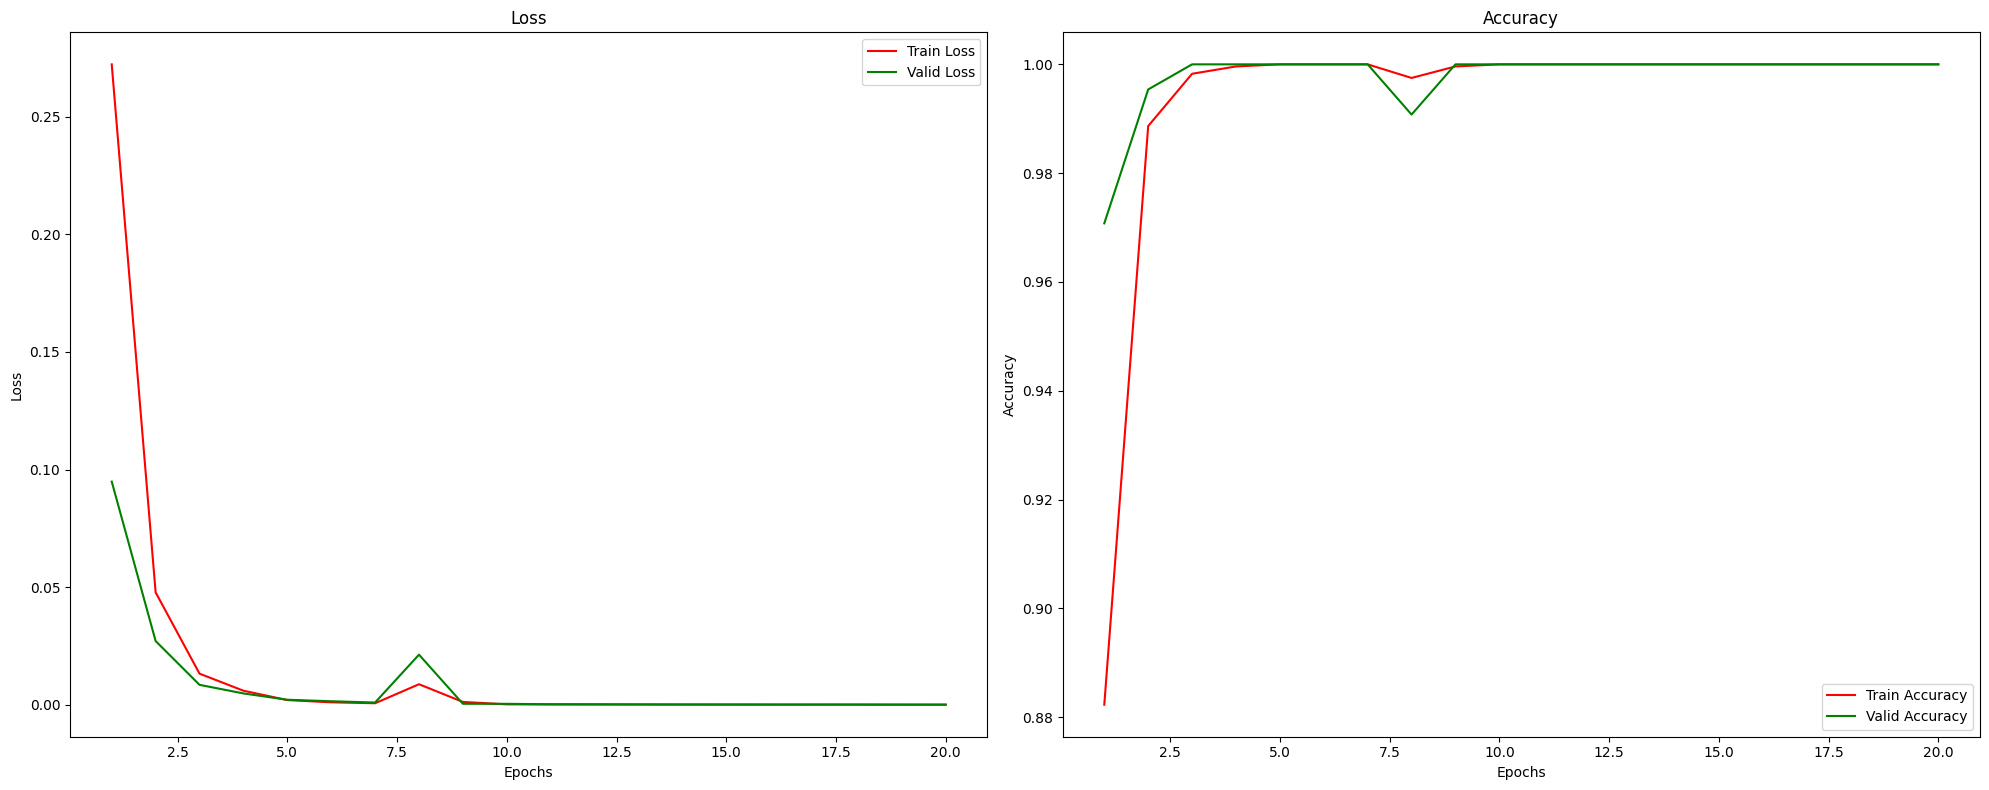

In [31]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# **Model with L2 Regularization**

In [24]:
model_l2 = keras.Sequential(
    [layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape = (22,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1,activation='sigmoid')],name = 'L2_regularization'  
)
print("Model with L2 Regularization Created")

Model with L2 Regularization Created


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model_l2.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
print("Model compiled")

Model compiled


In [29]:
print("Model training")
history_2 = model_l2.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1,validation_split=0.2)

Model training
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8034 - loss: 1.5173 - val_accuracy: 0.9123 - val_loss: 0.7321
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9405 - loss: 0.6223 - val_accuracy: 0.9538 - val_loss: 0.4632
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.4060 - val_accuracy: 0.9785 - val_loss: 0.3472
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.3256 - val_accuracy: 0.9815 - val_loss: 0.2852
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9919 - loss: 0.2651 - val_accuracy: 0.9908 - val_loss: 0.2400
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9932 - loss: 0.2298 - val_accuracy: 0.9923 - val_loss: 0.2131
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.1992 - val_accuracy: 0.9938 - val_loss: 0.1884
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.1847 - v

In [30]:
test_loss_L2_reg,test_acc_L2_reg = model_l2.evaluate(X_test,y_test,verbose=1)
print(f"Test accuracy : {test_acc_L2_reg}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0947
Test accuracy : 0.9975384473800659


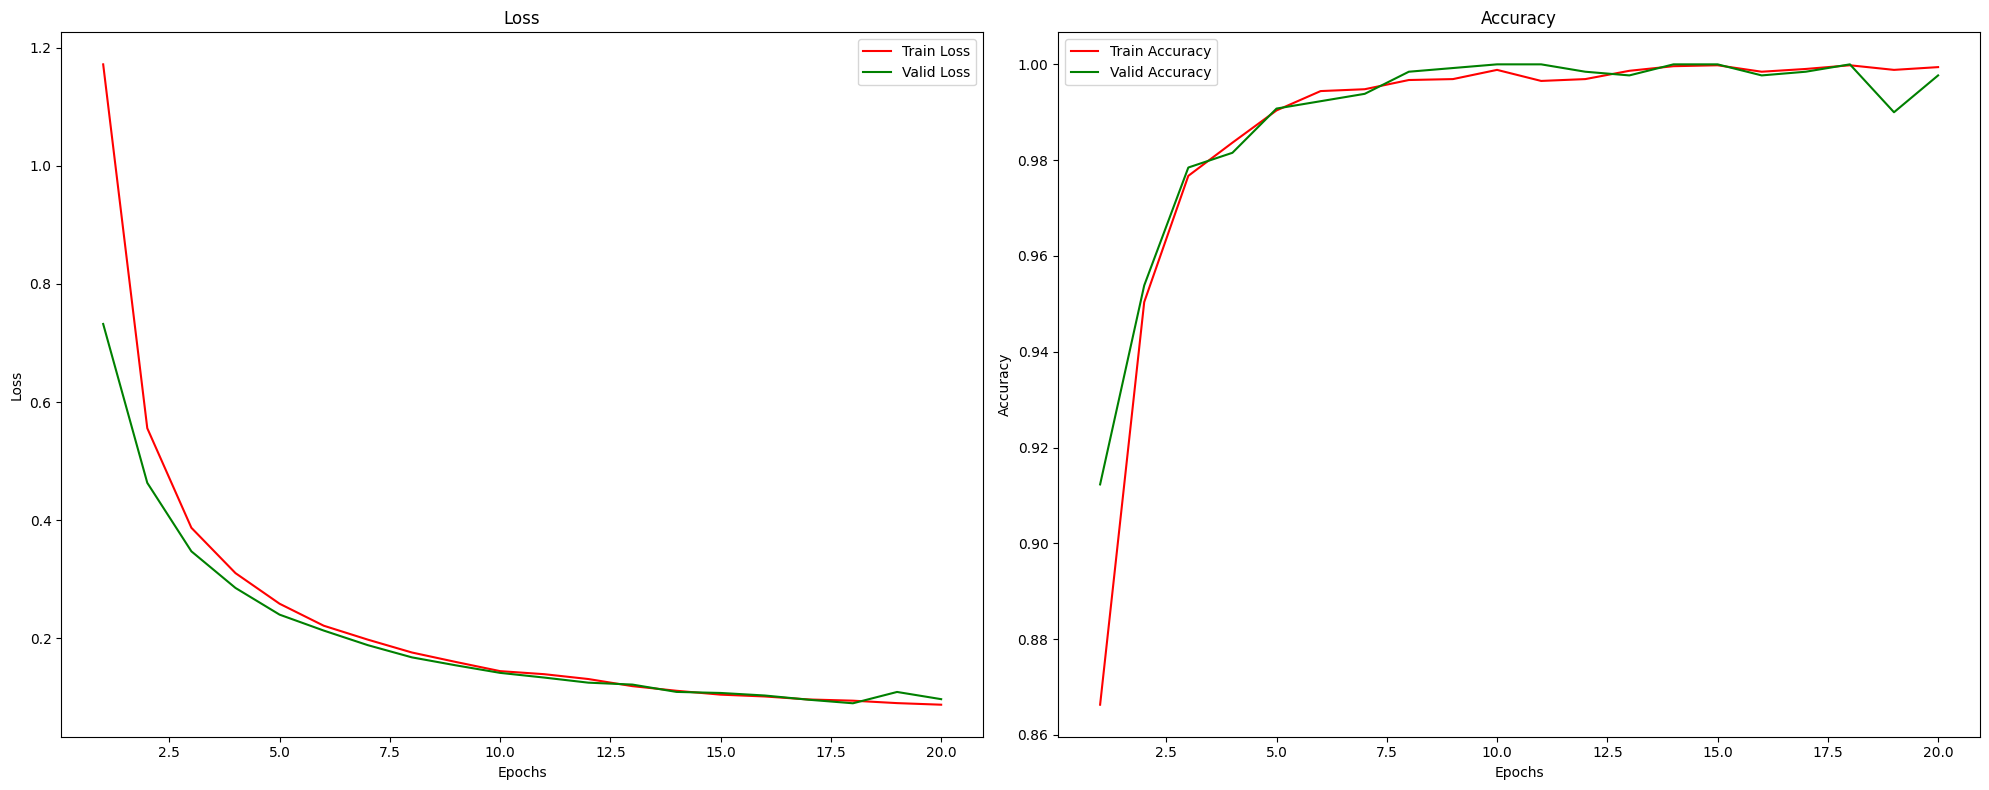

In [32]:
tr_acc = history_2.history['accuracy']
tr_loss = history_2.history['loss']
val_acc = history_2.history['val_accuracy']
val_loss = history_2.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# **Model with L1 Regularization**

In [34]:
model_l1 = keras.Sequential(
    [layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1(0.01),input_shape = (22,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(1,activation='sigmoid')],name = 'L2_regularization'  
)
print("Model with L1 Regularization Created")

Model with L1 Regularization Created


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model_l1.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
print("Model compiled")

Model compiled


In [37]:
print("Model training")
history_3 = model_l1.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1,validation_split=0.2)

Model training
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9660 - loss: 0.2646 - val_accuracy: 0.9538 - val_loss: 0.3024
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9640 - loss: 0.2628 - val_accuracy: 0.9469 - val_loss: 0.2929
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.2653 - val_accuracy: 0.9508 - val_loss: 0.2869
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9606 - loss: 0.2668 - val_accuracy: 0.9508 - val_loss: 0.2842
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9670 - loss: 0.2539 - val_accuracy: 0.9531 - val_loss: 0.2782
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.2617 - val_accuracy: 0.9531 - val_loss: 0.2748
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.2392 - val_accuracy: 0.9592 - val_loss: 0.2717
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9686 - loss: 0.2441 - v

In [38]:
test_loss_L1_reg,test_acc_L1_reg = model_l1.evaluate(X_test,y_test,verbose=1)
print(f"Test accuracy : {test_acc_L1_reg}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9629 - loss: 0.2448
Test accuracy : 0.963692307472229


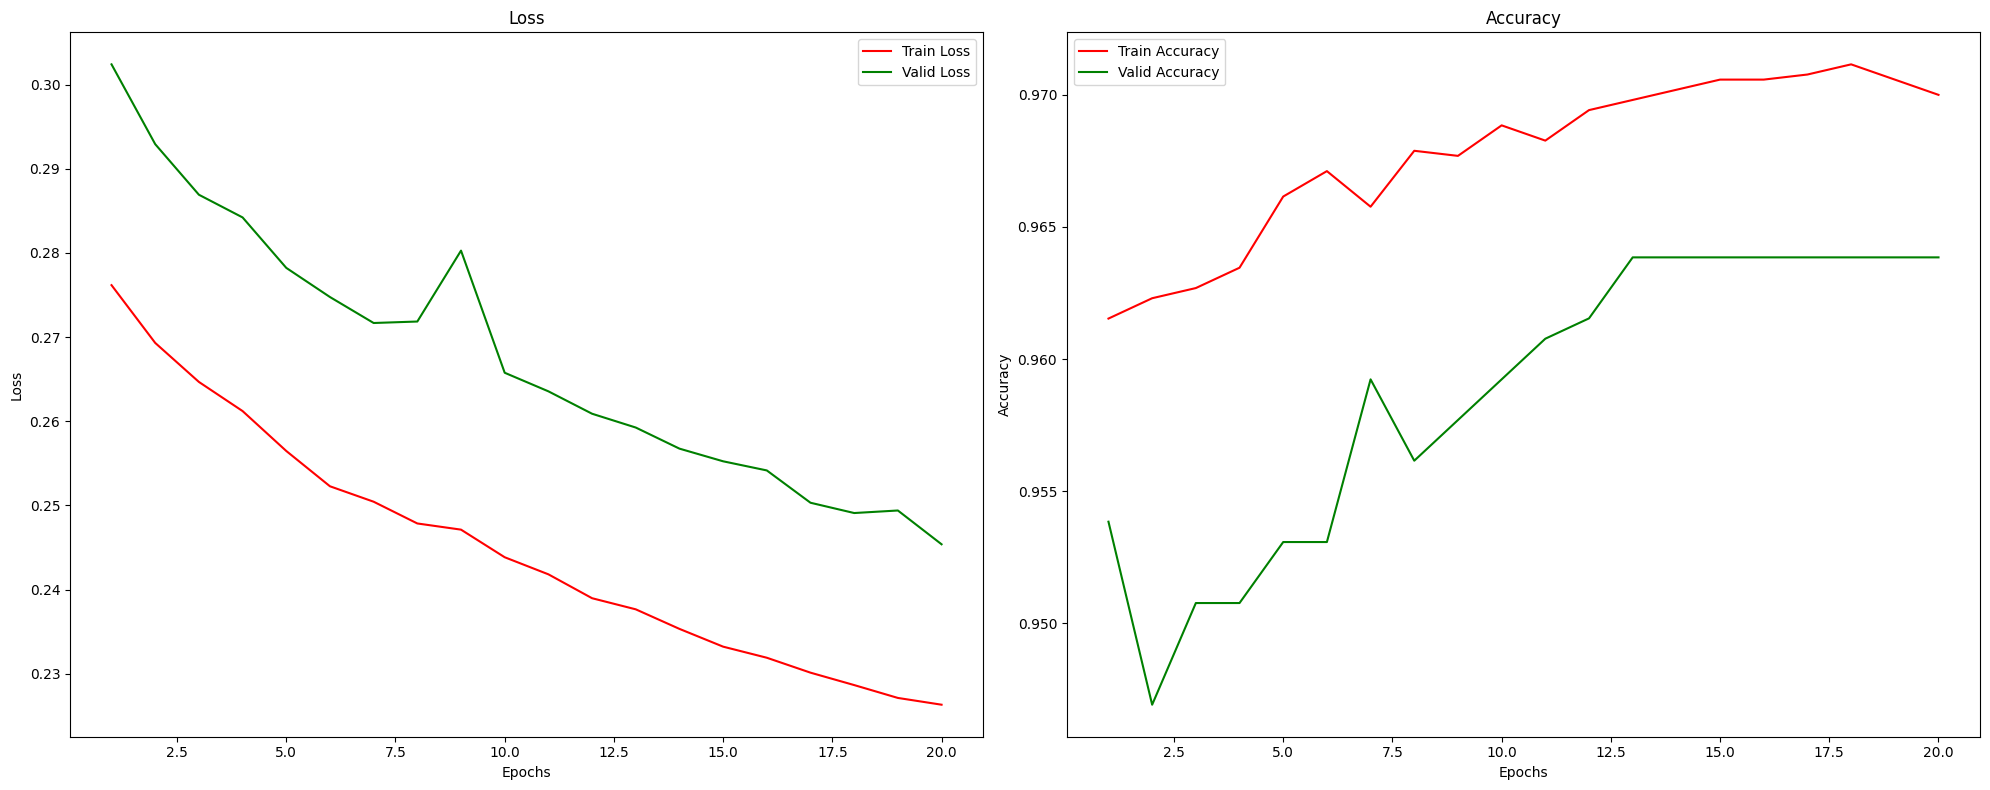

In [ ]:
tr_acc = history_3.history['accuracy']
tr_loss = history_3.history['loss']
val_acc = history_3.history['val_accuracy']
val_loss = history_3.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()
# **Model with Droupout**

# **Model with Droupout**

In [44]:
model_droupout = keras.Sequential(
    [layers.Dense(64,activation='relu',input_shape = (22,)),layers.Dropout(0.3),
    layers.Dense(64,activation='relu'),layers.Dropout(0.3),
    layers.Dense(32,activation='relu'),layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')],name = 'droupout_regularization'  
)
print("Model with Droupout Regularization Created")

Model with Droupout Regularization Created


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model_droupout.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
print("Model compiled")

Model compiled


In [47]:
print("Model training")
history_4 = model_droupout.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1,validation_split=0.2)

Model training
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6558 - loss: 0.6788 - val_accuracy: 0.8654 - val_loss: 0.3165
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.3352 - val_accuracy: 0.9115 - val_loss: 0.1748
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.2155 - val_accuracy: 0.9708 - val_loss: 0.0843
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9555 - loss: 0.1235 - val_accuracy: 0.9823 - val_loss: 0.0486
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.0800 - val_accuracy: 0.9885 - val_loss: 0.0324
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.0666 - val_accuracy: 0.9962 - val_loss: 0.0202
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9859 - loss: 0.0434 - val_accuracy: 0.9938 - val_loss: 0.0190
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.0380 - v

In [48]:
test_loss_Droupout_reg,test_acc_Droupout_reg = model_droupout.evaluate(X_test,y_test,verbose=1)
print(f"Test accuracy : {test_acc_Droupout_reg}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0012   
Test accuracy : 1.0


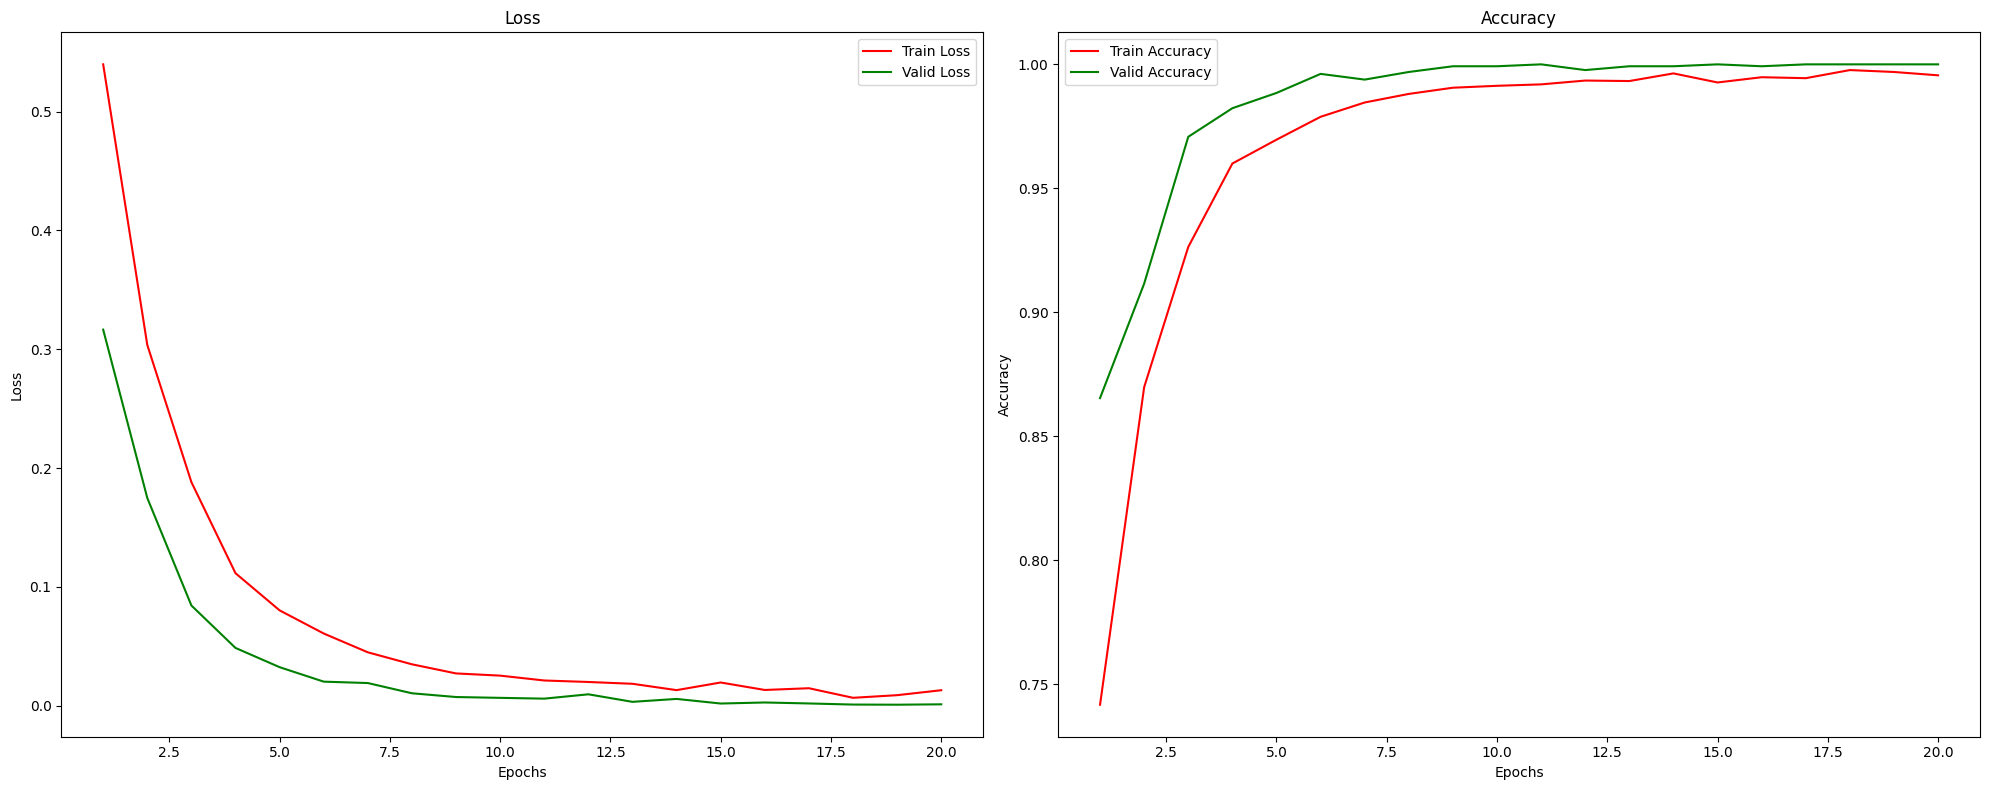

In [49]:
tr_acc = history_4.history['accuracy']
tr_loss = history_4.history['loss']
val_acc = history_4.history['val_accuracy']
val_loss = history_4.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()
# **Model with Droupout**

# **Model with Combined Regularization(l2 + Droupout)**

In [50]:
model_combined = keras.Sequential(
    [layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape = (22,)),layers.Dropout(0.3),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),layers.Dropout(0.3),
    layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.001)),layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001))],name = 'droupout_regularization'  
)
print("Model with Combined Regularization Created")

Model with Combined Regularization Created


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model_combined.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
print("Model compiled")

Model compiled


In [52]:
print("Model training")
history_5 = model_combined.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1,validation_split=0.2)

Model training
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6700 - loss: 0.7710 - val_accuracy: 0.8638 - val_loss: 0.4236
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.4373 - val_accuracy: 0.9315 - val_loss: 0.2750
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9245 - loss: 0.2912 - val_accuracy: 0.9823 - val_loss: 0.1703
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.2007 - val_accuracy: 0.9854 - val_loss: 0.1455
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9692 - loss: 0.1833 - val_accuracy: 0.9931 - val_loss: 0.1240
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.1481 - val_accuracy: 0.9985 - val_loss: 0.1079
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.1264 - val_accuracy: 0.9992 - val_loss: 0.0981
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.1222 - v

In [55]:
test_loss_combined_reg,test_acc_combined_reg = model_combined.evaluate(X_test,y_test,verbose=1)
print(f"Test accuracy : {test_acc_combined_reg}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0477
Test accuracy : 1.0
